<a href="https://colab.research.google.com/github/crislanecas/estudos_python/blob/main/Ada%26SantanderCoders/06_Aula_Scikit_learn_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Importa a biblioteca para conectar o Google Drive ao ambiente Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importa os dados do arquivo CSV.
df = pd.read_csv('/content/drive/MyDrive/Datasets/breast-cancer.csv')

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [ ]:
# Mostra um resumo conciso do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Dataframe com as variáveis explicativas
X = df.drop(columns=['id','diagnosis'], axis=1)

# Series com a variável dependente
y = df['diagnosis']

In [ ]:
# Instancia o modelo
modelo = LogisticRegression(max_iter=10000)

In [ ]:
# Utiliza a função train_test_split para retornar uma lista de quatro itens que serão criados com os elementos da listas acima
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Utiliza o método fit() para estimar o modelo com dados passados como parâmetro
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Cria uma previsão utilizando o método predict()
y_previsto = modelo.predict(X_test)

# Matriz de confusão

In [ ]:
# Cria uma matriz de confusão para avaliar o medelo
cm = confusion_matrix(y_test, y_previsto)

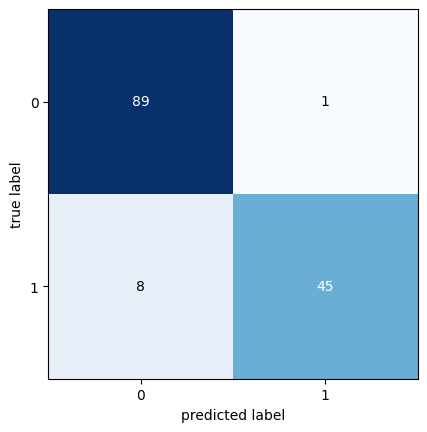

In [ ]:
# Plota a matriz de confusão do mdelo
plot_confusion_matrix(cm);

# Métricas

- Acurácia: Mede a proporção de previsões corretas em relação ao total de previsões (calculada com os valores diagonais da matriz: (89+45)/143 que é total da matriz).  
- Precisão: É a proporção de verdadeiros positivos entre os exemplos que foram classificados como positivos (calculada com os valores verticais a esquerda da matriz: 89/(89+8)).
- Recall: É a proporção de verdadeiros positivos entre os exemplos que são realmente positivos (calculada com os valores horizontal da matriz: 89/(89+1)).  
- F1-Score: É a média harmônica da precisão e do recall, oferecendo uma única métrica que balanceia ambos.  
- Suporte: É o número de ocorrências reais de cada classe no conjunto de dados.
- Macro Média: Calcula a média das métricas (precisão, recall, F1-score) para cada classe individualmente e depois calcula a média dessas médias.
- Média Ponderada: A média ponderada calcula a média das métricas (precisão, recall, F1-score) para cada classe, ponderada pelo suporte (número de instâncias) de cada classe.


In [ ]:
# Gera um relatório com as métricas do modelo
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           B       0.92      0.99      0.95        90
           M       0.98      0.85      0.91        53

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143

